# Homework 4 — build a classifier to predict the subtype from the gene expression data and to visualize the data's structure.

测试集分类准确率: 0.9900


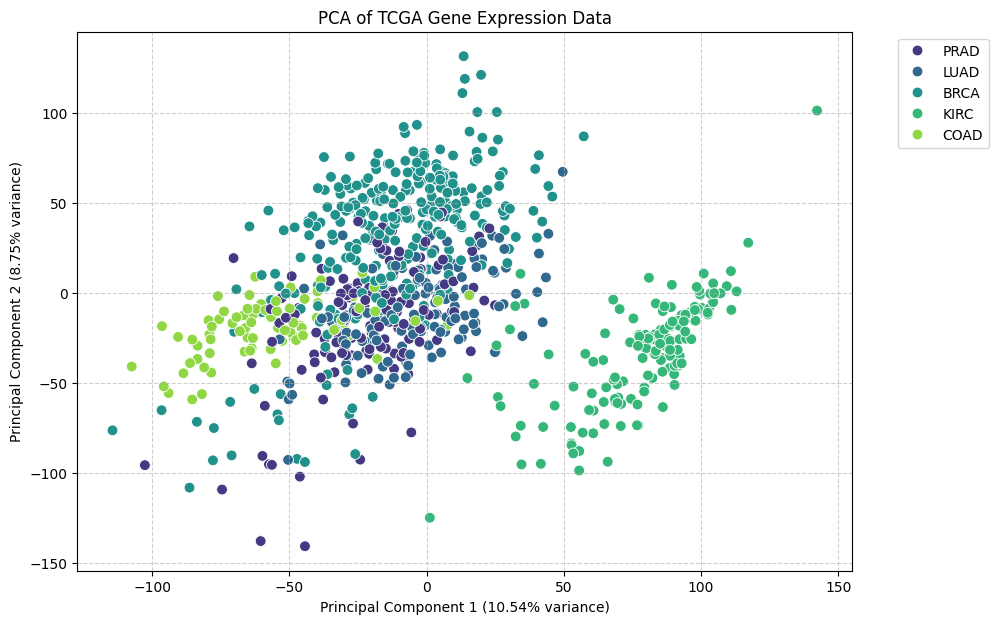

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. 加载数据
# 假设文件已下载到本地。注意：UCI提供的原始数据通常包含 ID 列，需要处理。
data = pd.read_csv('data.csv', index_col=0)
labels = pd.read_csv('labels.csv', index_col=0)

# 确保数据和标签的顺序一致
y = labels['Class']
X = data

# 2. 划分数据集
# 使用 stratify=y 确保训练集和测试集的类别比例一致
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3. 训练逻辑回归分类器
# 增加 max_iter 是因为基因数据维度极高，模型需要更多迭代来收敛
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. 评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"测试集分类准确率: {accuracy:.4f}")

# --- Bonus: PCA 降维与可视化 ---

# 在 PCA 之前通常需要进行标准化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. 执行 PCA 降维到 2 个主成分
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 将结果转为 DataFrame 方便绘图
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Subtype'] = y.values

# 6. 绘制散点图
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Subtype', data=pca_df, palette='viridis', s=60)
plt.title('PCA of TCGA Gene Expression Data')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()